In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df = pd.read_csv("ecommerce_ml.csv")
df.head()

,Region,City,Category,Sub-Category,Quantity,Unit Price,Discount,Sales,Payment Mode,Year,Month,Sales_log
0,South,Bangalore,Books,Non-Fiction,2,36294,5,68958.6,Debit Card,2024,10,11.141276
1,North,Delhi,Groceries,Rice,1,42165,20,33732.0,Debit Card,2025,8,10.426232
2,East,Patna,Kitchen,Juicer,4,64876,20,207603.2,Credit Card,2023,11,12.243389
3,East,Kolkata,Groceries,Oil,5,37320,15,158610.0,UPI,2025,5,11.974210
4,West,Pune,Clothing,Kids Wear,1,50037,10,45033.3,Debit Card,2025,1,10.715180


In [44]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Region        5000 non-null   object 
 1   City          5000 non-null   object 
 2   Category      5000 non-null   object 
 3   Sub-Category  5000 non-null   object 
 4   Quantity      5000 non-null   int64  
 5   Unit Price    5000 non-null   int64  
 6   Discount      5000 non-null   int64  
 7   Sales         5000 non-null   float64
 8   Payment Mode  5000 non-null   object 
 9   Year          5000 non-null   int64  
 10  Month         5000 non-null   int64  
 11  Sales_log     5000 non-null   float64
dtypes: float64(2), int64(5), object(5)
memory usage: 468.9+ KB


Region          0
City            0
Category        0
Sub-Category    0
Quantity        0
Unit Price      0
Discount        0
Sales           0
Payment Mode    0
Year            0
Month           0
Sales_log       0
dtype: int64

In [45]:
df_monthly = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()
df_monthly.head()

,Year,Month,Sales
0,2023,10,21307522.20
1,2023,11,22040269.20
2,2023,12,20624240.25
3,2024,1,21477241.40
4,2024,2,19853396.50


In [46]:
df_monthly['Date'] = pd.to_datetime(
    df_monthly['Year'].astype(str) + '-' + df_monthly['Month'].astype(str)
)

df_monthly = df_monthly.sort_values('Date')


In [47]:
df_monthly = df_monthly[['Date', 'Sales']]
df_monthly.set_index('Date', inplace=True)

df_monthly.head()


,Sales
Date,
2023-10-01,21307522.20
2023-11-01,22040269.20
2023-12-01,20624240.25
2024-01-01,21477241.40
2024-02-01,19853396.50


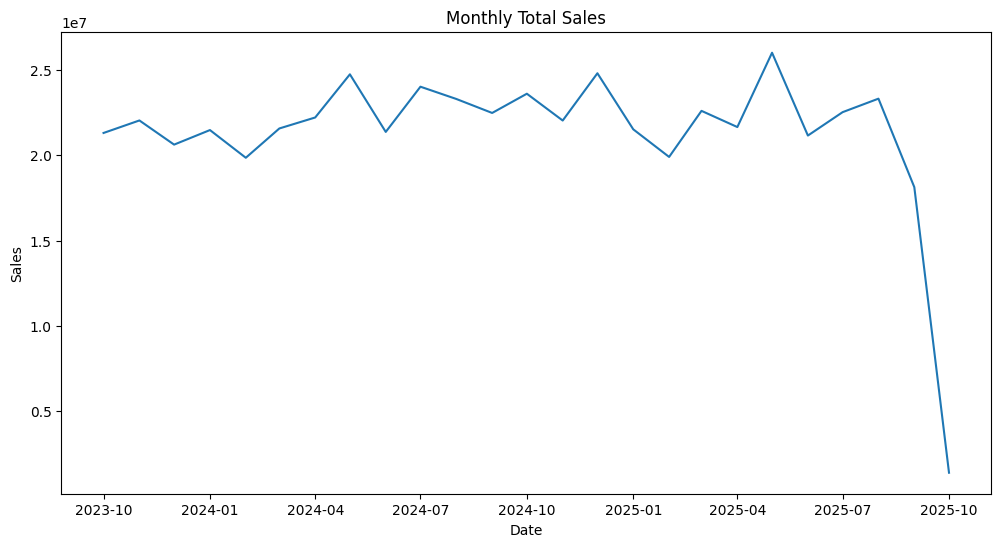

In [48]:
plt.figure(figsize=(12,6))
plt.plot(df_monthly['Sales'])
plt.title("Monthly Total Sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()


In [49]:
df_monthly.tail(12)


,Sales
Date,
2024-11-01,22036247.55
2024-12-01,24806786.40
2025-01-01,21520801.80
2025-02-01,19902446.10
2025-03-01,22602988.75
2025-04-01,21653817.90
2025-05-01,26010928.65
2025-06-01,21155496.20
2025-07-01,22526567.55


In [50]:
df_monthly.describe()


,Sales
count,2.500000e+01
mean,2.134664e+07
std,4.494521e+06
min,1.391328e+06
25%,2.130752e+07
50%,2.203625e+07
75%,2.329989e+07
max,2.601093e+07


In [51]:
df_monthly.index.year.unique()


Index([2023, 2024, 2025], dtype='int32', name='Date')

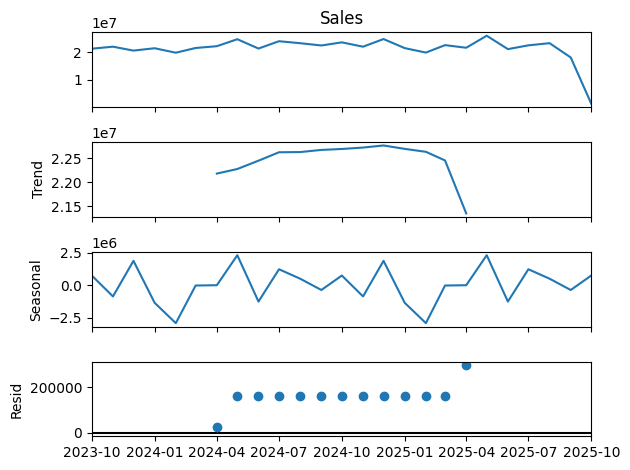

In [52]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df_monthly['Sales'], model='additive', period=12)
decomposition.plot()
plt.show()


In [53]:
df_monthly.tail(6)


,Sales
Date,
2025-05-01,26010928.65
2025-06-01,21155496.20
2025-07-01,22526567.55
2025-08-01,23317916.20
2025-09-01,18131496.70
2025-10-01,1391328.40


Heqim muajin e fundit sepse nuk eshte i plot

In [54]:
df_monthly = df_monthly.iloc[:-1]
df_monthly.tail(5)


,Sales
Date,
2025-05-01,26010928.65
2025-06-01,21155496.20
2025-07-01,22526567.55
2025-08-01,23317916.20
2025-09-01,18131496.70


Train / Test Split

In [55]:
train = df_monthly.iloc[:-12]
test = df_monthly.iloc[-12:]

In [56]:
print("Train size:", len(train))
print("Test size:", len(test))


Train size: 12
Test size: 12


1️⃣ Baseline Model (Historical Mean)

In [58]:
baseline_pred = [train['Sales'].mean()] * len(test)
print(baseline_pred)

[np.float64(22083464.625000004), np.float64(22083464.625000004), np.float64(22083464.625000004), np.float64(22083464.625000004), np.float64(22083464.625000004), np.float64(22083464.625000004), np.float64(22083464.625000004), np.float64(22083464.625000004), np.float64(22083464.625000004), np.float64(22083464.625000004), np.float64(22083464.625000004), np.float64(22083464.625000004)]
